# Logistic regression

import the library

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


load the data

In [2]:
#path = 'ex2data1.csv'
path = 'ex2data2.csv'
data = pd.read_csv(path)
data.head()

,Exam_1,Exam_2,Admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


visualize the data

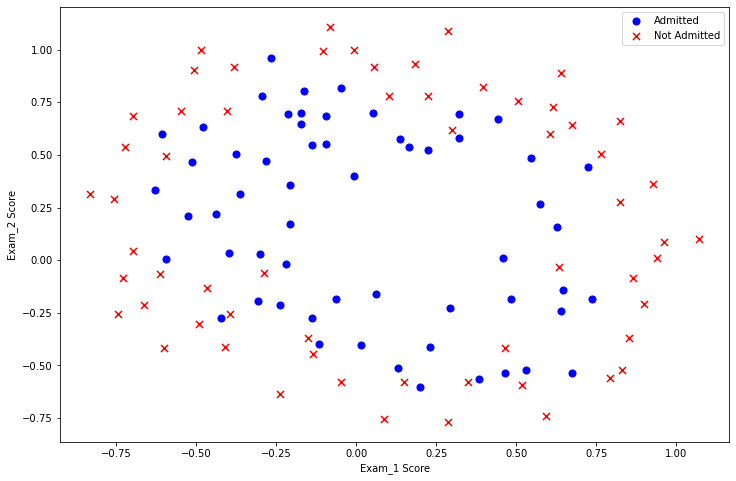

In [3]:
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam_1'],
           positive['Exam_2'],
           s=50,
           c='b',
           marker='o',
           label='Admitted')
ax.scatter(negative['Exam_1'],
           negative['Exam_2'],
           s=50,
           c='r',
           marker='x',
           label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam_1 Score')
ax.set_ylabel('Exam_2 Score')
plt.show()

set X (training data) and y (target variable)

In [4]:
X = data[['Exam_1','Exam_2']] #input
y = data[['Admitted']] #target value

use the existing library to peform LogisticRegression

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none',solver="sag") #define the function

clf.fit(X, y) #training

clf.score(X, y) #accuracy

0.5508474576271186

Prediction with probabilities

In [6]:
probs = clf.predict_proba(X)

In [7]:
probs

array([[0.51060797, 0.48939203],
       [0.49961642, 0.50038358],
       [0.49047211, 0.50952789],
       [0.47738679, 0.52261321],
       [0.46676486, 0.53323514],
       [0.46474063, 0.53525937],
       [0.47352734, 0.52647266],
       [0.47947969, 0.52052031],
       [0.50298376, 0.49701624],
       [0.51122622, 0.48877378],
       [0.530191  , 0.469809  ],
       [0.54125949, 0.45874051],
       [0.55074128, 0.44925872],
       [0.55834519, 0.44165481],
       [0.5470972 , 0.4529028 ],
       [0.5305834 , 0.4694166 ],
       [0.51861317, 0.48138683],
       [0.50370939, 0.49629061],
       [0.49356378, 0.50643622],
       [0.47013576, 0.52986424],
       [0.46040255, 0.53959745],
       [0.45748059, 0.54251941],
       [0.45860462, 0.54139538],
       [0.47039738, 0.52960262],
       [0.49296493, 0.50703507],
       [0.51607028, 0.48392972],
       [0.53641439, 0.46358561],
       [0.55202522, 0.44797478],
       [0.49549075, 0.50450925],
       [0.48475463, 0.51524537],
       [0.

In [10]:
print (clf.intercept_, clf.coef_)


[-0.01419453] [[-0.30350521 -0.01813128]]


# OR develop logistic regression from scratch

define sigmoid function

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

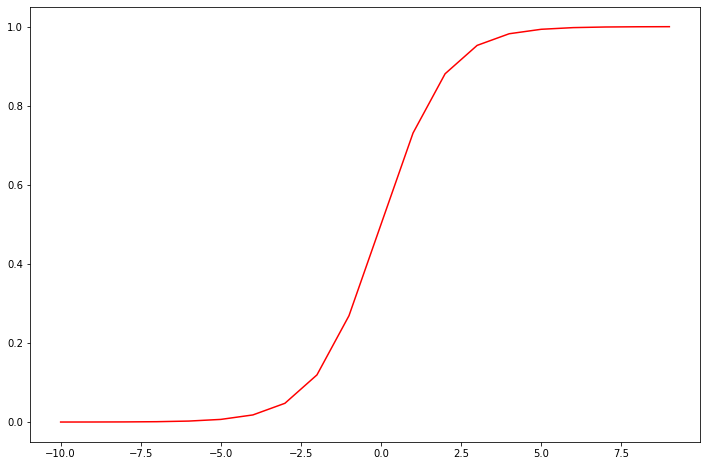

In [12]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

Cost function of logistic regression：

$J\left(w\right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{({{y}^{(i)}}\log \left( {h}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{h}\left( {{x}^{(i)}} \right) \right))}$

In [13]:
def cost_function(w, X, y):
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(y, np.log(prediction(w, X)))
    second = np.multiply((1 - y), np.log(1 - prediction(w, X)))
    return -np.sum(first + second) / (len(X))

set X (training data) and y (target variable)

In [14]:
data.insert(0, 'ones', 1)

X = np.array(data[['ones','Exam_1','Exam_2']])
y = np.array(data['Admitted'])


In [15]:
X.shape, y.shape

((118, 3), (118,))

In [16]:
X.shape

(118, 3)

define hypothesis(prediction) and gradient function

In [19]:
def prediction(w, X):
    prob = sigmoid(np.dot(X,w.T))
    return prob

def gradient(w,X, y):
    
    error = prediction(w, X) - y
    
    grad = np.dot(error, X)/len(X)

    return grad

training process

In [20]:
maxiter = 10000
alpha = 0.001
tolerance =  0.0000001
iternum = 0

#w = np.array([-0.00710481, -0.30351496, -0.01814396])
w = np.random.uniform(-1,1,3)
#w = np.zeros(3) # initialize the parameters

costs = []
for i in range(maxiter):
    
    #estimation
    prob = prediction(w,X)
    
    #cost
    cost = cost_function(w, X, y) 
    costs.append(cost)
    
    #gradient
    grad = gradient(w, X, y)
 
    #update
    w_new = w - alpha * grad
    
    iternum = i+1
    if abs(np.sum(w_new - w)) < tolerance:
        print("converaged")
        break
    w = w_new
    print(i, cost)
    

0 94.87120273713026
1 94.86523108180901
2 94.85926192634999
3 94.85329526995835
4 94.84733111183934
5 94.84136945119819
6 94.83541028724025
7 94.8294536191708
8 94.82349944619529
9 94.81754776751913
10 94.81159858234781
11 94.80565188988687
12 94.79970768934184
13 94.79376597991842
14 94.78782676082217
15 94.78189003125888
16 94.77595579043425
17 94.77002403755412
18 94.7640947718243
19 94.75816799245074
20 94.75224369863929
21 94.74632188959602
22 94.74040256452689
23 94.73448572263804
24 94.72857136313556
25 94.72265948522563
26 94.7167500881145
27 94.71084317100838
28 94.70493873311364
29 94.6990367736366
30 94.69313729178373
31 94.68724028676145
32 94.68134575777626
33 94.67545370403475
34 94.66956412474352
35 94.6636770191092
36 94.65779238633854
37 94.65191022563828
38 94.64603053621519
39 94.64015331727616
40 94.6342785680281
41 94.62840628767795
42 94.62253647543271
43 94.61666913049943
44 94.61080425208526
45 94.60494183939733
46 94.59908189164283
47 94.59322440802902
48 94.58

923 90.32144066873508
924 90.3174486285002
925 90.31345839291488
926 90.30946996128499
927 90.30548333291658
928 90.30149850711582
929 90.29751548318906
930 90.2935342604428
931 90.28955483818372
932 90.28557721571862
933 90.28160139235447
934 90.27762736739841
935 90.27365514015776
936 90.26968470993992
937 90.26571607605251
938 90.26174923780329
939 90.25778419450018
940 90.25382094545125
941 90.24985948996473
942 90.24589982734904
943 90.24194195691268
944 90.23798587796442
945 90.23403158981307
946 90.23007909176766
947 90.22612838313741
948 90.2221794632316
949 90.21823233135979
950 90.21428698683155
951 90.21034342895676
952 90.20640165704538
953 90.20246167040753
954 90.19852346835353
955 90.19458705019373
956 90.19065241523883
957 90.1867195627996
958 90.18278849218689
959 90.1788592027118
960 90.1749316936856
961 90.17100596441966
962 90.16708201422557
963 90.16315984241503
964 90.1592394482999
965 90.1553208311922
966 90.15140399040418
967 90.14748892524814
968 90.14357563503

1673 87.78783308960597
1674 87.7850112063584
1675 87.78219065445764
1676 87.77937143333864
1677 87.77655354243653
1678 87.7737369811866
1679 87.77092174902432
1680 87.76810784538539
1681 87.76529526970563
1682 87.76248402142103
1683 87.75967409996787
1684 87.75686550478244
1685 87.75405823530137
1686 87.75125229096135
1687 87.74844767119933
1688 87.74564437545237
1689 87.74284240315777
1690 87.74004175375299
1691 87.73724242667565
1692 87.73444442136358
1693 87.73164773725478
1694 87.72885237378738
1695 87.72605833039978
1696 87.7232656065305
1697 87.72047420161822
1698 87.71768411510187
1699 87.71489534642052
1700 87.71210789501339
1701 87.7093217603199
1702 87.70653694177973
1703 87.70375343883259
1704 87.70097125091849
1705 87.69819037747753
1706 87.69541081795009
1707 87.69263257177666
1708 87.6898556383979
1709 87.68708001725469
1710 87.68430570778807
1711 87.68153270943928
1712 87.6787610216497
1713 87.67599064386091
1714 87.67322157551467
1715 87.67045381605296
1716 87.667687364

2376 86.1017839379178
2377 86.09976882773424
2378 86.09775469538164
2379 86.09574154041802
2380 86.09372936240159
2381 86.09171816089068
2382 86.08970793544381
2383 86.08769868561971
2384 86.08569041097718
2385 86.08368311107527
2386 86.08167678547316
2387 86.07967143373023
2388 86.07766705540595
2389 86.07566365006006
2390 86.07366121725241
2391 86.07165975654297
2392 86.06965926749201
2393 86.06765974965982
2394 86.06566120260698
2395 86.06366362589411
2396 86.06166701908212
2397 86.05967138173203
2398 86.05767671340502
2399 86.0556830136624
2400 86.05369028206576
2401 86.05169851817679
2402 86.04970772155727
2403 86.04771789176928
2404 86.045729028375
2405 86.04374113093677
2406 86.04175419901712
2407 86.03976823217873
2408 86.03778322998446
2409 86.03579919199731
2410 86.03381611778049
2411 86.03183400689736
2412 86.02985285891138
2413 86.0278726733863
2414 86.02589344988591
2415 86.02391518797427
2416 86.02193788721553
2417 86.01996154717402
2418 86.01798616741434
2419 86.01601174

3173 84.77145909752224
3174 84.77009658206558
3175 84.76873474218733
3176 84.76737357756706
3177 84.76601308788446
3178 84.76465327281934
3179 84.76329413205167
3180 84.76193566526156
3181 84.76057787212922
3182 84.75922075233501
3183 84.75786430555947
3184 84.75650853148322
3185 84.75515342978703
3186 84.75379900015183
3187 84.75244524225867
3188 84.75109215578873
3189 84.74973974042331
3190 84.7483879958439
3191 84.74703692173205
3192 84.74568651776953
3193 84.7443367836382
3194 84.74298771902005
3195 84.7416393235972
3196 84.74029159705194
3197 84.73894453906668
3198 84.73759814932397
3199 84.73625242750644
3200 84.73490737329698
3201 84.73356298637844
3202 84.732219266434
3203 84.73087621314683
3204 84.72953382620028
3205 84.72819210527786
3206 84.72685105006317
3207 84.72551066024002
3208 84.72417093549224
3209 84.72283187550391
3210 84.72149347995916
3211 84.72015574854233
3212 84.71881868093783
3213 84.71748227683022
3214 84.71614653590422
3215 84.71481145784468
3216 84.71347704

3871 83.96795500901727
3872 83.9669933783074
3873 83.96603223028652
3874 83.96507156471907
3875 83.96411138136965
3876 83.9631516800029
3877 83.9621924603836
3878 83.96123372227665
3879 83.96027546544703
3880 83.95931768965981
3881 83.95836039468021
3882 83.95740358027358
3883 83.95644724620527
3884 83.95549139224083
3885 83.95453601814592
3886 83.95358112368625
3887 83.95262670862765
3888 83.95167277273607
3889 83.9507193157776
3890 83.94976633751835
3891 83.94881383772464
3892 83.94786181616281
3893 83.9469102725994
3894 83.94595920680091
3895 83.94500861853408
3896 83.94405850756571
3897 83.9431088736627
3898 83.94215971659207
3899 83.94121103612093
3900 83.94026283201651
3901 83.93931510404614
3902 83.93836785197725
3903 83.93742107557738
3904 83.9364747746142
3905 83.93552894885545
3906 83.93458359806898
3907 83.93363872202278
3908 83.93269432048488
3909 83.93175039322351
3910 83.9308069400069
3911 83.92986396060348
3912 83.92892145478174
3913 83.92797942231026
3914 83.92703786295

4750 83.28484556904976
4751 83.28422843860946
4752 83.28361162075157
4753 83.28299511531993
4754 83.28237892215854
4755 83.28176304111135
4756 83.28114747202245
4757 83.28053221473598
4758 83.27991726909623
4759 83.27930263494744
4760 83.27868831213402
4761 83.2780743005004
4762 83.27746059989116
4763 83.27684721015083
4764 83.27623413112414
4765 83.27562136265584
4766 83.2750089045907
4767 83.27439675677367
4768 83.27378491904976
4769 83.27317339126392
4770 83.27256217326135
4771 83.27195126488722
4772 83.27134066598681
4773 83.27073037640545
4774 83.2701203959886
4775 83.2695107245817
4776 83.26890136203035
4777 83.26829230818018
4778 83.26768356287691
4779 83.26707512596634
4780 83.26646699729432
4781 83.26585917670678
4782 83.26525166404977
4783 83.26464445916932
4784 83.26403756191164
4785 83.26343097212292
4786 83.2628246896495
4787 83.26221871433776
4788 83.26161304603414
4789 83.26100768458517
4790 83.26040262983747
4791 83.25979788163767
4792 83.25919343983257
4793 83.25858930

5521 82.89096557376072
5522 82.89054833604591
5523 82.8901313104141
5524 82.88971449675799
5525 82.88929789497031
5526 82.88888150494388
5527 82.88846532657155
5528 82.88804935974622
5529 82.88763360436086
5530 82.88721806030847
5531 82.88680272748216
5532 82.88638760577498
5533 82.88597269508016
5534 82.8855579952909
5535 82.88514350630045
5536 82.88472922800219
5537 82.88431516028947
5538 82.88390130305577
5539 82.88348765619452
5540 82.88307421959927
5541 82.88266099316364
5542 82.88224797678124
5543 82.88183517034581
5544 82.88142257375107
5545 82.88101018689082
5546 82.88059800965894
5547 82.8801860419493
5548 82.8797742836559
5549 82.87936273467272
5550 82.87895139489385
5551 82.87854026421337
5552 82.87812934252545
5553 82.87771862972437
5554 82.87730812570436
5555 82.87689783035972
5556 82.87648774358489
5557 82.87607786527424
5558 82.87566819532228
5559 82.87525873362355
5560 82.8748494800726
5561 82.87444043456412
5562 82.87403159699275
5563 82.87362296725325
5564 82.87321454

6135 82.67086761079274
6136 82.67056229240512
6137 82.67025712928589
6138 82.66995212135599
6139 82.6696472685364
6140 82.6693425707481
6141 82.66903802791214
6142 82.66873363994961
6143 82.66842940678161
6144 82.66812532832934
6145 82.66782140451397
6146 82.66751763525677
6147 82.667214020479
6148 82.66691056010198
6149 82.66660725404708
6150 82.6663041022357
6151 82.66600110458927
6152 82.66569826102926
6153 82.6653955714772
6154 82.66509303585464
6155 82.66479065408319
6156 82.66448842608446
6157 82.66418635178016
6158 82.66388443109197
6159 82.66358266394165
6160 82.663281050251
6161 82.66297958994186
6162 82.66267828293607
6163 82.66237712915557
6164 82.66207612852229
6165 82.66177528095821
6166 82.66147458638538
6167 82.66117404472588
6168 82.66087365590175
6169 82.6605734198352
6170 82.66027333644838
6171 82.65997340566352
6172 82.65967362740288
6173 82.65937400158874
6174 82.65907452814349
6175 82.65877520698945
6176 82.65847603804907
6177 82.6581770212448
6178 82.6578781564991

6921 82.47299379222488
6922 82.47278903194129
6923 82.47258437558136
6924 82.47237982309187
6925 82.47217537441965
6926 82.47197102951162
6927 82.4717667883146
6928 82.47156265077557
6929 82.47135861684143
6930 82.47115468645917
6931 82.47095085957582
6932 82.47074713613836
6933 82.47054351609388
6934 82.47033999938944
6935 82.47013658597214
6936 82.46993327578915
6937 82.46973006878761
6938 82.46952696491468
6939 82.46932396411765
6940 82.46912106634369
6941 82.46891827154009
6942 82.46871557965417
6943 82.46851299063322
6944 82.46831050442458
6945 82.46810812097569
6946 82.46790584023388
6947 82.46770366214662
6948 82.46750158666134
6949 82.46729961372554
6950 82.46709774328677
6951 82.46689597529247
6952 82.46669430969028
6953 82.46649274642775
6954 82.46629128545251
6955 82.46608992671223
6956 82.46588867015453
6957 82.46568751572711
6958 82.46548646337774
6959 82.46528551305414
6960 82.46508466470405
6961 82.46488391827533
6962 82.46468327371575
6963 82.46448273097323
6964 82.4642

7743 82.33531339057033
7744 82.33517836443015
7745 82.33504340648228
7746 82.33490851669175
7747 82.33477369502363
7748 82.33463894144296
7749 82.33450425591485
7750 82.33436963840437
7751 82.33423508887667
7752 82.33410060729688
7753 82.33396619363012
7754 82.33383184784162
7755 82.33369756989654
7756 82.33356335976008
7757 82.33342921739751
7758 82.33329514277405
7759 82.33316113585494
7760 82.33302719660547
7761 82.33289332499096
7762 82.33275952097671
7763 82.33262578452808
7764 82.33249211561038
7765 82.332358514189
7766 82.33222498022933
7767 82.33209151369677
7768 82.33195811455676
7769 82.33182478277469
7770 82.33169151831606
7771 82.33155832114636
7772 82.33142519123105
7773 82.33129212853564
7774 82.33115913302566
7775 82.3310262046667
7776 82.33089334342428
7777 82.33076054926399
7778 82.33062782215141
7779 82.3304951620522
7780 82.33036256893196
7781 82.33023004275637
7782 82.33009758349107
7783 82.32996519110176
7784 82.32983286555414
7785 82.32970060681396
7786 82.3295684

8578 82.24326179676561
8579 82.2431730989147
8580 82.24308444550226
8581 82.24299583650553
8582 82.24290727190177
8583 82.24281875166821
8584 82.24273027578214
8585 82.24264184422078
8586 82.24255345696149
8587 82.24246511398155
8588 82.24237681525824
8589 82.24228856076891
8590 82.24220035049089
8591 82.24211218440153
8592 82.2420240624782
8593 82.24193598469824
8594 82.24184795103906
8595 82.24175996147802
8596 82.24167201599259
8597 82.24158411456011
8598 82.24149625715806
8599 82.24140844376385
8600 82.24132067435495
8601 82.24123294890883
8602 82.24114526740294
8603 82.24105762981478
8604 82.24097003612187
8605 82.24088248630167
8606 82.24079498033174
8607 82.24070751818961
8608 82.24062009985283
8609 82.24053272529892
8610 82.24044539450549
8611 82.24035810745008
8612 82.24027086411031
8613 82.24018366446377
8614 82.24009650848808
8615 82.24000939616087
8616 82.23992232745975
8617 82.23983530236241
8618 82.23974832084647
8619 82.23966138288964
8620 82.23957448846957
8621 82.23948

9421 82.18222083785027
9422 82.18216257189322
9423 82.18210433480338
9424 82.18204612656605
9425 82.18198794716646
9426 82.18192979658993
9427 82.1818716748217
9428 82.18181358184708
9429 82.1817555176514
9430 82.1816974822199
9431 82.18163947553796
9432 82.18158149759087
9433 82.18152354836394
9434 82.18146562784254
9435 82.18140773601198
9436 82.18134987285765
9437 82.1812920383649
9438 82.18123423251909
9439 82.18117645530558
9440 82.18111870670977
9441 82.18106098671704
9442 82.18100329531279
9443 82.18094563248243
9444 82.18088799821138
9445 82.18083039248502
9446 82.18077281528883
9447 82.18071526660822
9448 82.18065774642861
9449 82.1806002547355
9450 82.18054279151431
9451 82.1804853567505
9452 82.18042795042955
9453 82.18037057253697
9454 82.1803132230582
9455 82.18025590197875
9456 82.18019860928416
9457 82.1801413449599
9458 82.1800841089915
9459 82.18002690136447
9460 82.17996972206437
9461 82.17991257107671
9462 82.17985544838704
9463 82.17979835398094
9464 82.179741287843

In [21]:
cost_function(w, X, y)

82.15287415555267

In [23]:
w

array([ 0.02108945, -0.24988315,  0.1240891 ])

cost vs. iteration

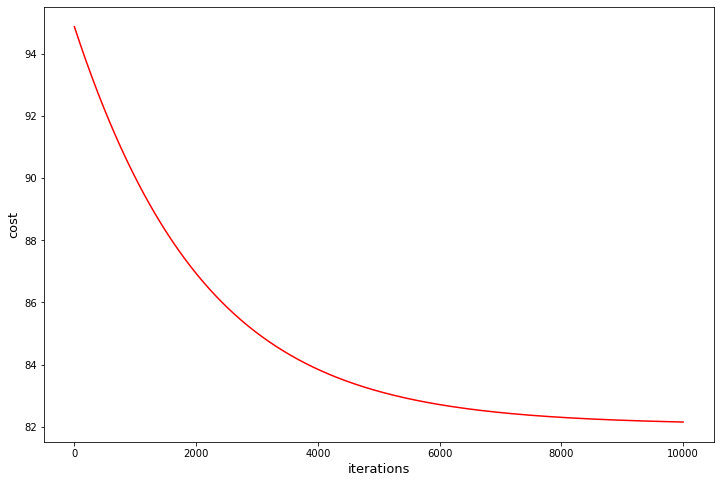

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iternum), costs, 'r')
ax.set_xlabel('iterations', fontsize=13)
ax.set_ylabel('cost', fontsize=13)
plt.show()

Predicting the training sample using the trained parameters
You can find a test to test your model.

Here, just for convenience, we treat the train set as test set

In [24]:
probs = prediction(w,X)
probs

array([0.52375372, 0.53226951, 0.54001242, 0.5441626 , 0.55159638,
       0.54444601, 0.53116362, 0.51840857, 0.49168911, 0.48109882,
       0.46373236, 0.45614574, 0.45791315, 0.45364326, 0.48625108,
       0.5032303 , 0.51158372, 0.53346738, 0.53773423, 0.55461867,
       0.56130985, 0.55467654, 0.54242959, 0.52310257, 0.50019156,
       0.4740732 , 0.45962609, 0.44678511, 0.53084505, 0.54771147,
       0.55154349, 0.54017448, 0.53615549, 0.53754217, 0.53759116,
       0.52483969, 0.51341475, 0.50352943, 0.49629307, 0.47816076,
       0.47986892, 0.46938195, 0.46070887, 0.47692211, 0.47103796,
       0.47766015, 0.47375571, 0.50753273, 0.49839453, 0.50663155,
       0.51451473, 0.51806459, 0.52820255, 0.52927327, 0.52362018,
       0.539311  , 0.51845286, 0.5054858 , 0.52273571, 0.51546542,
       0.50580328, 0.49715706, 0.48941472, 0.48605451, 0.47305306,
       0.45873639, 0.46246875, 0.44805365, 0.44723498, 0.44894613,
       0.44300235, 0.44092044, 0.43764655, 0.43865661, 0.44548

set threhold > 0.5

In [25]:
ypred = []
for prob in probs:
    if prob >= 0.5: #admitted
        ypred.append(1)
    elif prob < 0.5: #not
        ypred.append(0)

evaluate the model's peformance

In [26]:
def accuracy(y, ypred):
    correct = 0
    for i in range(len(y)):
        if y[i] == ypred[i]:
            correct += 1
    return correct/len(y)
            

In [27]:
accuracy(y, ypred)

0.5508474576271186

In [28]:
probs

array([0.52375372, 0.53226951, 0.54001242, 0.5441626 , 0.55159638,
       0.54444601, 0.53116362, 0.51840857, 0.49168911, 0.48109882,
       0.46373236, 0.45614574, 0.45791315, 0.45364326, 0.48625108,
       0.5032303 , 0.51158372, 0.53346738, 0.53773423, 0.55461867,
       0.56130985, 0.55467654, 0.54242959, 0.52310257, 0.50019156,
       0.4740732 , 0.45962609, 0.44678511, 0.53084505, 0.54771147,
       0.55154349, 0.54017448, 0.53615549, 0.53754217, 0.53759116,
       0.52483969, 0.51341475, 0.50352943, 0.49629307, 0.47816076,
       0.47986892, 0.46938195, 0.46070887, 0.47692211, 0.47103796,
       0.47766015, 0.47375571, 0.50753273, 0.49839453, 0.50663155,
       0.51451473, 0.51806459, 0.52820255, 0.52927327, 0.52362018,
       0.539311  , 0.51845286, 0.5054858 , 0.52273571, 0.51546542,
       0.50580328, 0.49715706, 0.48941472, 0.48605451, 0.47305306,
       0.45873639, 0.46246875, 0.44805365, 0.44723498, 0.44894613,
       0.44300235, 0.44092044, 0.43764655, 0.43865661, 0.44548

# Adding new features

In [555]:
degree = 3

x1 = data['Exam_1']
x2 = data['Exam_2']

for i in range(1, degree):
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data.drop('Exam_1', axis=1, inplace=True)
data.drop('Exam_2', axis=1, inplace=True)

data.head()

,ones,Admitted,F10,F20,F21
0,1,1,0.051267,0.002628,0.035864
1,1,1,-0.092742,0.008601,-0.063523
2,1,1,-0.213710,0.045672,-0.147941
3,1,1,-0.375000,0.140625,-0.188321
4,1,1,-0.513250,0.263426,-0.238990


In [556]:
#set input X and target value y
X = data[['ones','F10','F20','F21']]
y = data[['Admitted']]

In [557]:
#using sklearn to train the logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none',solver="sag")

clf.fit(X, y) #training

clf.score(X, y) #accuracy

0.6440677966101694